In [1]:
import rasa_nlu
import rasa_core
import spacy

In [2]:
nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- Quite bad - can I get a cute picture of a [bird](group:birds), please?
- Really bad and only [doggo](group:shibes) pics and change that.
- Not good. The only thing that could make me fell better is a picture of a cute [kitten](group:cats).
- so sad. Only the picture of a [puppy](group:shibes) could make it better.
- I am very sad. I need a [cat](group:cats) picture.
- Extremely sad. Only the cute [doggo](group:shibes) pics can make me feel better.
- Bad. Please show me a [bird](group:birds) pic!
- Pretty bad to be honest. Can you show me a [puppy](group:shibes) picture to make me fell better?

## intent: inform
- A [dog](group:shibes)
- [dog](group:shibes)
- [bird](group:birds)
- a [cat](group:cats)
- [cat](group:cats)
- a [bird](group:birds)
- of a [dog](group:shibes)
- of a [cat](group:cats)
- a [bird](group:birds), please
- a [dog](group:shibes), please
"""

%store nlu_md > nlu.md


Writing 'nlu_md' (str) to file 'nlu.md'.


In [3]:

config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

%store config > config.yml


Writing 'config' (str) to file 'config.yml'.


In [4]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

In [5]:
training_data = load_data('nlu.md')

In [6]:
#!python -m spacy download en

In [7]:
trainer = Trainer(config.load('config.yml'))

C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
trainer.train(training_data)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted 

In [9]:
model_directory = trainer.persist('./models/nlu' ,  fixed_model_name = 'current')

In [10]:
# from rasa_core import interpreter
# def pprint(o):
#     print(json.dumps(o, indent = 2))
    
# pprint(interpreter.parse("I am very sad. Could you send me a cat picture?"))

In [11]:
from rasa_nlu.evaluate import run_evaluation

C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\varshith\AppData\Local\conda\conda\envs\hemi\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


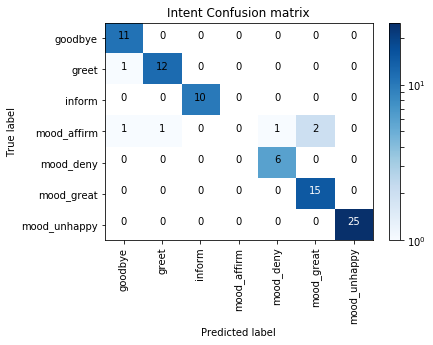

In [12]:
run_evaluation("nlu.md", model_directory)

In [13]:

stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_ask_picture
* inform{"animal":"dog"}  
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_picture
* inform{"group":"cat"}
  - action_retrieve_image
  - utter_did_that_help
* mood_deny
  - utter_goodbye
  
## sad path 3
* greet
  - utter_greet
* mood_unhappy{"group":"puppy"}
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


In [14]:
domain_yml = """
intents:
- greet
- goodbye
- mood_affirm
- mood_deny
- mood_great
- mood_unhappy
- inform

slots:
  group:
    type: text
    
entities:
- group

actions:
- utter_greet
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_picture
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
  
  utter_ask_picture:
  - text: "To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


In [15]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display
import requests

In [16]:
class ApiAction(Action):
    def name(self):
        return "action_retrieve_image"
    
    def run(self, dispatcher, tracker, domain):
        
        group = tracker.get_slot('group')
        
        r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsUrls=true'.format(group))
        response = r.content.decode()
        response = response.replace('["', "")
        response = response.replace('"]', "")
        
        dispatcher.utter_message("Here is something to cheer you up: {}".format(response))

In [17]:
#from IPython.display import Image
#from rasa_core.agent import Agent

In [18]:
#agent = Agent('domain.yml')
#agent.visualize("stories.md", "story_graph.png", max_history=2)
#Image(filename="story_graph.png")

In [19]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# The fallback action will be executed if the intent recognition has #a confidence below nlu_threshold or if none of the dialogue #policies predict an action with confidence higher than #core_threshold.

fallback = FallbackPolicy(fallback_action_name="utter_unclear",
                          core_threshold=0.2,
                          nlu_threshold=0.1)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(training_data,
    validation_split=0.0,
    epochs=200)

agent.persist('models/dialogue')

Using TensorFlow backend.
Processed trackers: 100%|█████████████████████████████████████████████| 204/204 [00:04<00:00, 41.91it/s, # actions=259]
Processed actions: 259it [00:00, 672.40it/s, # examples=259]
Processed trackers: 100%|█████████████████████████████████████████████| 204/204 [00:04<00:00, 43.99it/s, # actions=259]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 18)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6528      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 6,825
Trainable params: 6,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
259/259 [==============================] - ETA: 4s - loss: 2.2109 - acc: 0.062 - 1s 2ms/step - loss: 2.1541 - acc: 0.2471
Epoch 2/200
259/259 [==============================] - ETA: 0s - loss: 2.0630 - acc: 0.468 - 0s 170us/step - loss: 2.0549 - acc: 0.4363
Ep

259/259 [==============================] - ETA: 0s - loss: 0.6576 - acc: 0.843 - 0s 171us/step - loss: 0.6078 - acc: 0.8571
Epoch 55/200
259/259 [==============================] - ETA: 0s - loss: 0.5510 - acc: 0.875 - 0s 157us/step - loss: 0.6256 - acc: 0.8533
Epoch 56/200
259/259 [==============================] - ETA: 0s - loss: 0.7235 - acc: 0.750 - 0s 157us/step - loss: 0.6049 - acc: 0.8378
Epoch 57/200
259/259 [==============================] - ETA: 0s - loss: 0.4947 - acc: 0.812 - 0s 150us/step - loss: 0.5666 - acc: 0.8726
Epoch 58/200
259/259 [==============================] - ETA: 0s - loss: 0.4801 - acc: 0.875 - 0s 147us/step - loss: 0.5396 - acc: 0.8764
Epoch 59/200
259/259 [==============================] - ETA: 0s - loss: 0.5734 - acc: 0.781 - 0s 123us/step - loss: 0.5505 - acc: 0.8803
Epoch 60/200
259/259 [==============================] - ETA: 0s - loss: 0.4124 - acc: 0.875 - 0s 133us/step - loss: 0.5215 - acc: 0.8958
Epoch 61/200
259/259 [==============================] 

Epoch 114/200
259/259 [==============================] - ETA: 0s - loss: 0.1837 - acc: 0.906 - 0s 168us/step - loss: 0.1503 - acc: 0.9575
Epoch 115/200
259/259 [==============================] - ETA: 0s - loss: 0.0558 - acc: 1.000 - 0s 155us/step - loss: 0.1424 - acc: 0.9614
Epoch 116/200
259/259 [==============================] - ETA: 0s - loss: 0.1867 - acc: 0.968 - 0s 142us/step - loss: 0.1427 - acc: 0.9537
Epoch 117/200
259/259 [==============================] - ETA: 0s - loss: 0.0954 - acc: 0.968 - 0s 184us/step - loss: 0.1267 - acc: 0.9768
Epoch 118/200
259/259 [==============================] - ETA: 0s - loss: 0.1542 - acc: 1.000 - 0s 177us/step - loss: 0.1543 - acc: 0.9614
Epoch 119/200
259/259 [==============================] - ETA: 0s - loss: 0.1934 - acc: 0.937 - 0s 182us/step - loss: 0.1245 - acc: 0.9768
Epoch 120/200
259/259 [==============================] - ETA: 0s - loss: 0.1170 - acc: 0.937 - 0s 149us/step - loss: 0.1343 - acc: 0.9730
Epoch 121/200
259/259 [===========

259/259 [==============================] - ETA: 0s - loss: 0.0875 - acc: 1.000 - 0s 144us/step - loss: 0.0901 - acc: 0.9846
Epoch 174/200
259/259 [==============================] - ETA: 0s - loss: 0.0529 - acc: 1.000 - 0s 185us/step - loss: 0.0708 - acc: 0.9884
Epoch 175/200
259/259 [==============================] - ETA: 0s - loss: 0.0478 - acc: 0.968 - 0s 191us/step - loss: 0.0703 - acc: 0.9846
Epoch 176/200
259/259 [==============================] - ETA: 0s - loss: 0.0595 - acc: 1.000 - 0s 192us/step - loss: 0.0714 - acc: 0.9961
Epoch 177/200
259/259 [==============================] - ETA: 0s - loss: 0.0522 - acc: 0.968 - 0s 153us/step - loss: 0.0743 - acc: 0.9807
Epoch 178/200
259/259 [==============================] - ETA: 0s - loss: 0.0835 - acc: 0.968 - 0s 142us/step - loss: 0.0483 - acc: 0.9884
Epoch 179/200
259/259 [==============================] - ETA: 0s - loss: 0.0579 - acc: 1.000 - 0s 199us/step - loss: 0.0463 - acc: 0.9961
Epoch 180/200
259/259 [=========================

In [21]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

In [22]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
Hi 
Hey! How are you?
cool how are you
To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?
fine
Here is something to cheer you up: Invalid endpoint.
Did that help you?
goodbye
Great carry on!
bye
Bye
stop
